<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/ADS_Network_analysis_module_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycombo
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import numpy as np
import scipy.stats as stat
import numpy as np
#make sure plots are embedded into the notebook
%matplotlib inline
import statsmodels.api as sm
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
path = 'https://raw.githubusercontent.com/CUSP-ADS2025/Data/main/'
cities = pd.read_csv(path + 'citiesTable.csv', index_col=0)
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [16]:
#now read the links
links = pd.read_csv(path + 'citiesToCities.csv' , index_col=0 )
links.head()

,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
departure city,,,,,,,,,
Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [17]:
#create the graph (assume connections are symmatric directionality)
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)
EN=len(links.index)
edgelist=[(links['departure country'][j],links['arrival city'][j]) for j in range(EN)]
Flights.add_edges_from(edgelist)

Task (World airports).
Q1.

Find the network connected components, report their number and the sizes.

In [18]:
# Find connected components
components = list(nx.connected_components(Flights))

# Number of connected components
num_components = len(components)

# Sizes of each component
component_sizes = sorted([len(comp) for comp in components], reverse=True)

# Output the results
print(f"Number of connected components: {num_components}")
print("Sizes of connected components:")
for i, size in enumerate(component_sizes):
    print(f"Component {i+1}: {size} nodes")


Number of connected components: 7
Sizes of connected components:
Component 1: 3184 nodes
Component 2: 1 nodes
Component 3: 1 nodes
Component 4: 1 nodes
Component 5: 1 nodes
Component 6: 1 nodes
Component 7: 1 nodes


Q2.

In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with alpha = 0.85

In [21]:
# Work with largest connected component
largest_cc = max(nx.connected_components(Flights), key=len)
subgraph = Flights.subgraph(largest_cc).copy()

In [22]:
degree_centrality = nx.degree_centrality(subgraph)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 by Degree Centrality:")
for city, score in top_degree:
    print(f"{city}: {score:.4f}")


Top 10 by Degree Centrality:
United States: 0.2466
United Kingdom: 0.1112
Canada: 0.1100
France: 0.0961
Germany: 0.0955
China: 0.0877
Russia: 0.0795
Spain: 0.0729
Netherlands: 0.0663
Italy: 0.0653


In [23]:
betweenness_centrality = nx.betweenness_centrality(subgraph)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 by Betweenness Centrality:")
for city, score in top_betweenness:
    print(f"{city}: {score:.4f}")


Top 10 by Betweenness Centrality:
United States: 0.3480
Canada: 0.1255
China: 0.0763
Brazil: 0.0706
Russia: 0.0617
United Kingdom: 0.0536
France: 0.0486
Hong Kong: 0.0437
Singapore: 0.0432
Paris: 0.0373


In [24]:
closeness_centrality = nx.closeness_centrality(subgraph)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 by Closeness Centrality:")
for city, score in top_closeness:
    print(f"{city}: {score:.4f}")


Top 10 by Closeness Centrality:
Paris: 0.4603
Frankfurt: 0.4539
Hong Kong: 0.4519
London: 0.4512
Amsterdam: 0.4479
Dubai: 0.4437
Singapore: 0.4424
Istanbul: 0.4363
Doha: 0.4360
Rome: 0.4340


In [25]:
pagerank = nx.pagerank(subgraph, alpha=0.85)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 by PageRank (α = 0.85):")
for city, score in top_pagerank:
    print(f"{city}: {score:.6f}")


Top 10 by PageRank (α = 0.85):
United States: 0.061212
Canada: 0.023082
China: 0.013614
Brazil: 0.012141
United Kingdom: 0.011453
Russia: 0.010240
France: 0.009852
Germany: 0.008960
Mexico: 0.007237
Spain: 0.007047


Q3.

Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

In [26]:
largest_cc = max(nx.connected_components(Flights), key=len)
subgraph = Flights.subgraph(largest_cc).copy()
path_lengths = dict(nx.all_pairs_shortest_path_length(subgraph))
# Collect all path lengths
all_lengths = []

max_length = 0
max_pair = (None, None)

for source, targets in path_lengths.items():
    for target, length in targets.items():
        if source != target:
            all_lengths.append(length)
            if length > max_length:
                max_length = length
                max_pair = (source, target)

average_length = sum(all_lengths) / len(all_lengths)

print(f"Maximum shortest path length: {max_length} (between {max_pair[0]} and {max_pair[1]})")
print(f"Average shortest path length: {average_length:.2f}")

Maximum shortest path length: 7 (between Ilulissat and Falkland Islands)
Average shortest path length: 3.62


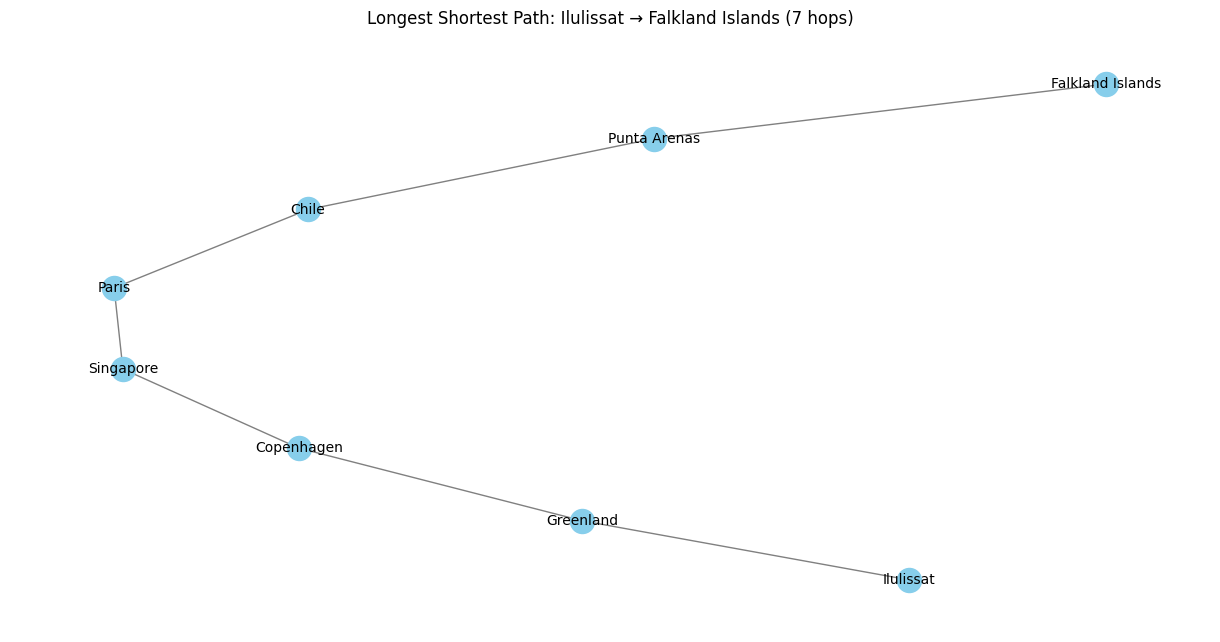

In [27]:
# Get the actual path
longest_path_nodes = nx.shortest_path(subgraph, source=max_pair[0], target=max_pair[1])

# Create subgraph of the path
path_subgraph = subgraph.subgraph(longest_path_nodes)

# Plot the path
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
pos = nx.spring_layout(path_subgraph, seed=42)
nx.draw(path_subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=300, font_size=10)
plt.title(f"Longest Shortest Path: {max_pair[0]} → {max_pair[1]} ({max_length} hops)")
plt.show()


Find average network distance among the top 100 airports by pagerank (with ) alpha = 0.85 within the largest connected component

In [28]:
# PageRank on the largest component (undirected graph)
pagerank = nx.pagerank(subgraph, alpha=0.85)

# Get top 100 airports by PageRank
top_100_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:100]
top_100_nodes = [node for node, score in top_100_nodes]
from itertools import combinations

# Collect all shortest path lengths among the top 100
pairwise_distances = []

for u, v in combinations(top_100_nodes, 2):
    try:
        length = nx.shortest_path_length(subgraph, source=u, target=v)
        pairwise_distances.append(length)
    except nx.NetworkXNoPath:
        continue  # Skip if no path exists (shouldn’t happen in the largest component)

# Calculate average distance
average_distance_top100 = sum(pairwise_distances) / len(pairwise_distances)
print(f"Average network distance among top 100 airports by PageRank: {average_distance_top100:.2f}")


Average network distance among top 100 airports by PageRank: 1.97


In [30]:
# Already computed earlier:
pagerank = nx.pagerank(subgraph, alpha=0.85)

# Sort and take top 10
top_10_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Airports by PageRank (α = 0.85):")
for rank, (city, score) in enumerate(top_10_pagerank, 1):
    print(f"{rank}. {city} — PageRank Score: {score:.6f}")

Top 10 Airports by PageRank (α = 0.85):
1. United States — PageRank Score: 0.061212
2. Canada — PageRank Score: 0.023082
3. China — PageRank Score: 0.013614
4. Brazil — PageRank Score: 0.012141
5. United Kingdom — PageRank Score: 0.011453
6. Russia — PageRank Score: 0.010240
7. France — PageRank Score: 0.009852
8. Germany — PageRank Score: 0.008960
9. Mexico — PageRank Score: 0.007237
10. Spain — PageRank Score: 0.007047


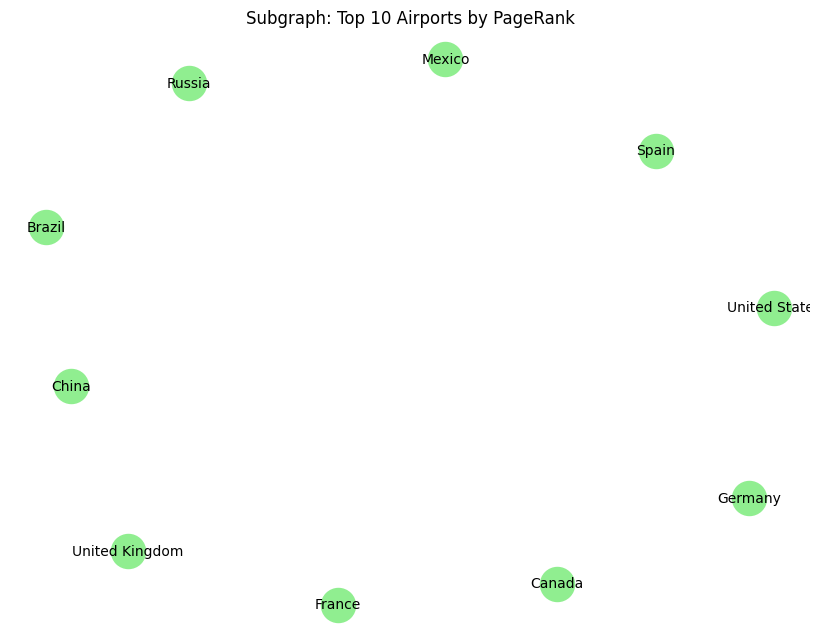

In [31]:
import matplotlib.pyplot as plt

# Extract just those 10 cities
top_10_nodes = [city for city, _ in top_10_pagerank]
top10_subgraph = subgraph.subgraph(top_10_nodes)

# Plot
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(top10_subgraph, seed=42)
nx.draw(top10_subgraph, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=600, font_size=10)
plt.title("Subgraph: Top 10 Airports by PageRank")
plt.show()

In [32]:
# From Q4 (top 100 airports)
avg_top100_distance = sum(pairwise_distances) / len(pairwise_distances)

# From Q3 (entire largest component)
# Re-compute if not saved earlier:
all_lengths = []
for source, targets in nx.all_pairs_shortest_path_length(subgraph):
    all_lengths.extend([l for t, l in targets.items() if source != t])
avg_overall_distance = sum(all_lengths) / len(all_lengths)

# Compare
print(f"\n🔍 Comparison of Average Network Distance:")
print(f"Top 100 by PageRank: {avg_top100_distance:.2f}")
print(f"Entire Largest Component: {avg_overall_distance:.2f}")


🔍 Comparison of Average Network Distance:
Top 100 by PageRank: 1.97
Entire Largest Component: 3.62


Q5.

Partition the entire network using Combo algorithm, visualize the partition

In [36]:
!pip install pycombo
import pycombo
import networkx as nx

# Assuming 'Flights' is your undirected NetworkX graph
partition = pycombo.execute(Flights)

# Assuming 'Flights' is your undirected NetworkX graph
partition = pycombo.execute(Flights)


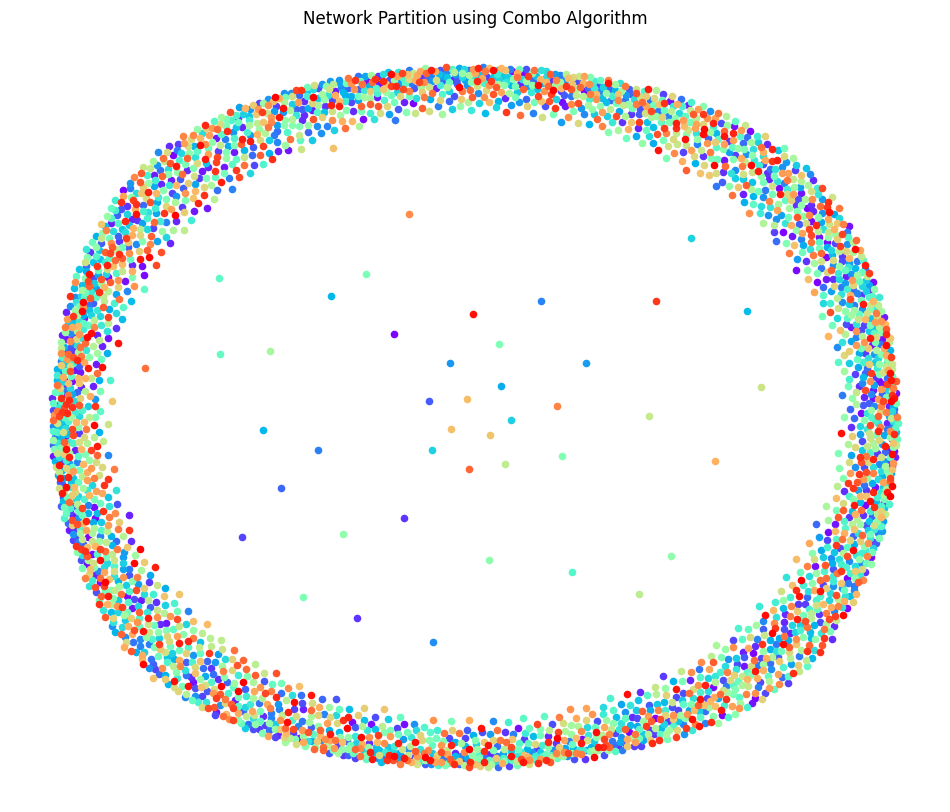

In [50]:
import pycombo
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import networkx as nx

# Run Combo algorithm
labels, modularity = pycombo.execute(Flights)

# Map node to community label
node_list = list(Flights.nodes())
partition = dict(zip(node_list, labels))

# Unique communities
communities = set(partition.values())
colors = cm.rainbow(np.linspace(0, 1, len(communities)))

# Layout
pos = nx.spring_layout(Flights, seed=42)

# Plotting
plt.figure(figsize=(12, 10))
for community, color in zip(communities, colors):
    nodes = [node for node in partition if partition[node] == community]
    nx.draw_networkx_nodes(Flights, pos, nodelist=nodes, node_size=20, node_color=[color])

nx.draw_networkx_edges(Flights, pos, alpha=0.05)
plt.title("Network Partition using Combo Algorithm")
plt.axis('off')
plt.show()


In [51]:
from collections import Counter

# Count community sizes
community_sizes = Counter(partition.values())
print(f"Total communities: {len(community_sizes)}")

# Top 10 largest
print("\nTop 10 largest communities:")
for comm, size in community_sizes.most_common(10):
    print(f"Community {comm}: {size} cities")

Total communities: 2988

Top 10 largest communities:
Community London: 1 cities
Community Chicago: 1 cities
Community Paris: 1 cities
Community Moscow: 1 cities
Community Shanghai: 1 cities
Community Beijing: 1 cities
Community Denver: 1 cities
Community Los Angeles: 1 cities
Community New York: 1 cities
Community Frankfurt: 1 cities
